# Predicting Daily Rainfall in Australia

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

## Importing data and conducting exploratory analysis

In [3]:
df = pd.read_csv('./data/weatherAUS.csv')

In [4]:
len(df)

145460

In [5]:
df.head().T

0           1           2           3           4
Date           2008-12-01  2008-12-02  2008-12-03  2008-12-04  2008-12-05
Location           Albury      Albury      Albury      Albury      Albury
MinTemp              13.4         7.4        12.9         9.2        17.5
MaxTemp              22.9        25.1        25.7        28.0        32.3
Rainfall              0.6         0.0         0.0         0.0         1.0
Evaporation           NaN         NaN         NaN         NaN         NaN
Sunshine              NaN         NaN         NaN         NaN         NaN
WindGustDir             W         WNW         WSW          NE           W
WindGustSpeed        44.0        44.0        46.0        24.0        41.0
WindDir9am              W         NNW           W          SE         ENE
WindDir3pm            WNW         WSW         WSW           E          NW
WindSpeed9am         20.0         4.0        19.0        11.0         7.0
WindSpeed3pm         24.0        22.0        26.0         9.0        20.0
Humidity9am          71.0        44.0        38.0        45.0        82.0
Humidity3pm          22.0        25.0        30.0        16.0        33.0
Pressure9am        1007.7      1010.6      1007.6      1017.6      1010.8
Pressure3pm        1007.1      1007.8      1008.7      1012.8      1006.0
Cloud9am              8.0         NaN         NaN         NaN         7.0
Cloud3pm              NaN         NaN         2.0         NaN         8.0
Temp9am              16.9        17.2        21.0        18.1        17.8
Temp3pm              21.8        24.3        23.2        26.5        29.7
RainToday              No          No          No          No          No
RainTomorrow           No          No          No          No          No

- Temps: degrees C
- Rainfall: mm per day
- Evaporation: mm per day
- Sunshine: hours per day
- Wind gust direction: compass point
- Wind gust speed: km/h
- Wind direction: compass point
- Wind speed: km/h
- Humidity: percentage
- Pressure: hPa
- Cloud cover: eighths

In [6]:
df.convert_dtypes().dtypes

Date             string[python]
Location         string[python]
MinTemp                 Float64
MaxTemp                 Float64
Rainfall                Float64
Evaporation             Float64
Sunshine                Float64
WindGustDir      string[python]
WindGustSpeed             Int64
WindDir9am       string[python]
WindDir3pm       string[python]
WindSpeed9am              Int64
WindSpeed3pm              Int64
Humidity9am               Int64
Humidity3pm               Int64
Pressure9am             Float64
Pressure3pm             Float64
Cloud9am                  Int64
Cloud3pm                  Int64
Temp9am                 Float64
Temp3pm                 Float64
RainToday        string[python]
RainTomorrow     string[python]
dtype: object

In [7]:
df.describe(include='all').T

count unique         top    freq         mean        std  \
Date             145460   3436  2013-11-12      49          NaN        NaN   
Location         145460     49    Canberra    3436          NaN        NaN   
MinTemp        143975.0    NaN         NaN     NaN    12.194034   6.398495   
MaxTemp        144199.0    NaN         NaN     NaN    23.221348   7.119049   
Rainfall       142199.0    NaN         NaN     NaN     2.360918    8.47806   
Evaporation     82670.0    NaN         NaN     NaN     5.468232   4.193704   
Sunshine        75625.0    NaN         NaN     NaN     7.611178   3.785483   
WindGustDir      135134     16           W    9915          NaN        NaN   
WindGustSpeed  135197.0    NaN         NaN     NaN     40.03523  13.607062   
WindDir9am       134894     16           N   11758          NaN        NaN   
WindDir3pm       141232     16          SE   10838          NaN        NaN   
WindSpeed9am   143693.0    NaN         NaN     NaN    14.043426   8.915375   
WindSpeed3pm   142398.0    NaN         NaN     NaN    18.662657     8.8098   
Humidity9am    142806.0    NaN         NaN     NaN    68.880831  19.029164   
Humidity3pm    140953.0    NaN         NaN     NaN    51.539116  20.795902   
Pressure9am    130395.0    NaN         NaN     NaN   1017.64994    7.10653   
Pressure3pm    130432.0    NaN         NaN     NaN  1015.255889   7.037414   
Cloud9am        89572.0    NaN         NaN     NaN     4.447461   2.887159   
Cloud3pm        86102.0    NaN         NaN     NaN      4.50993   2.720357   
Temp9am        143693.0    NaN         NaN     NaN    16.990631   6.488753   
Temp3pm        141851.0    NaN         NaN     NaN     21.68339    6.93665   
RainToday        142199      2          No  110319          NaN        NaN   
RainTomorrow     142193      2          No  110316          NaN        NaN   

                 min     25%     50%     75%     max  
Date             NaN     NaN     NaN     NaN     NaN  
Location         NaN     NaN     NaN     NaN     NaN  
MinTemp         -8.5     7.6    12.0    16.9    33.9  
MaxTemp         -4.8    17.9    22.6    28.2    48.1  
Rainfall         0.0     0.0     0.0     0.8   371.0  
Evaporation      0.0     2.6     4.8     7.4   145.0  
Sunshine         0.0     4.8     8.4    10.6    14.5  
WindGustDir      NaN     NaN     NaN     NaN     NaN  
WindGustSpeed    6.0    31.0    39.0    48.0   135.0  
WindDir9am       NaN     NaN     NaN     NaN     NaN  
WindDir3pm       NaN     NaN     NaN     NaN     NaN  
WindSpeed9am     0.0     7.0    13.0    19.0   130.0  
WindSpeed3pm     0.0    13.0    19.0    24.0    87.0  
Humidity9am      0.0    57.0    70.0    83.0   100.0  
Humidity3pm      0.0    37.0    52.0    66.0   100.0  
Pressure9am    980.5  1012.9  1017.6  1022.4  1041.0  
Pressure3pm    977.1  1010.4  1015.2  1020.0  1039.6  
Cloud9am         0.0     1.0     5.0     7.0     9.0  
Cloud3pm         0.0     2.0     5.0     7.0     9.0  
Temp9am         -7.2    12.3    16.7    21.6    40.2  
Temp3pm         -5.4    16.6    21.1    26.4    46.7  
RainToday        NaN     NaN     NaN     NaN     NaN  
RainTomorrow     NaN     NaN     NaN     NaN     NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

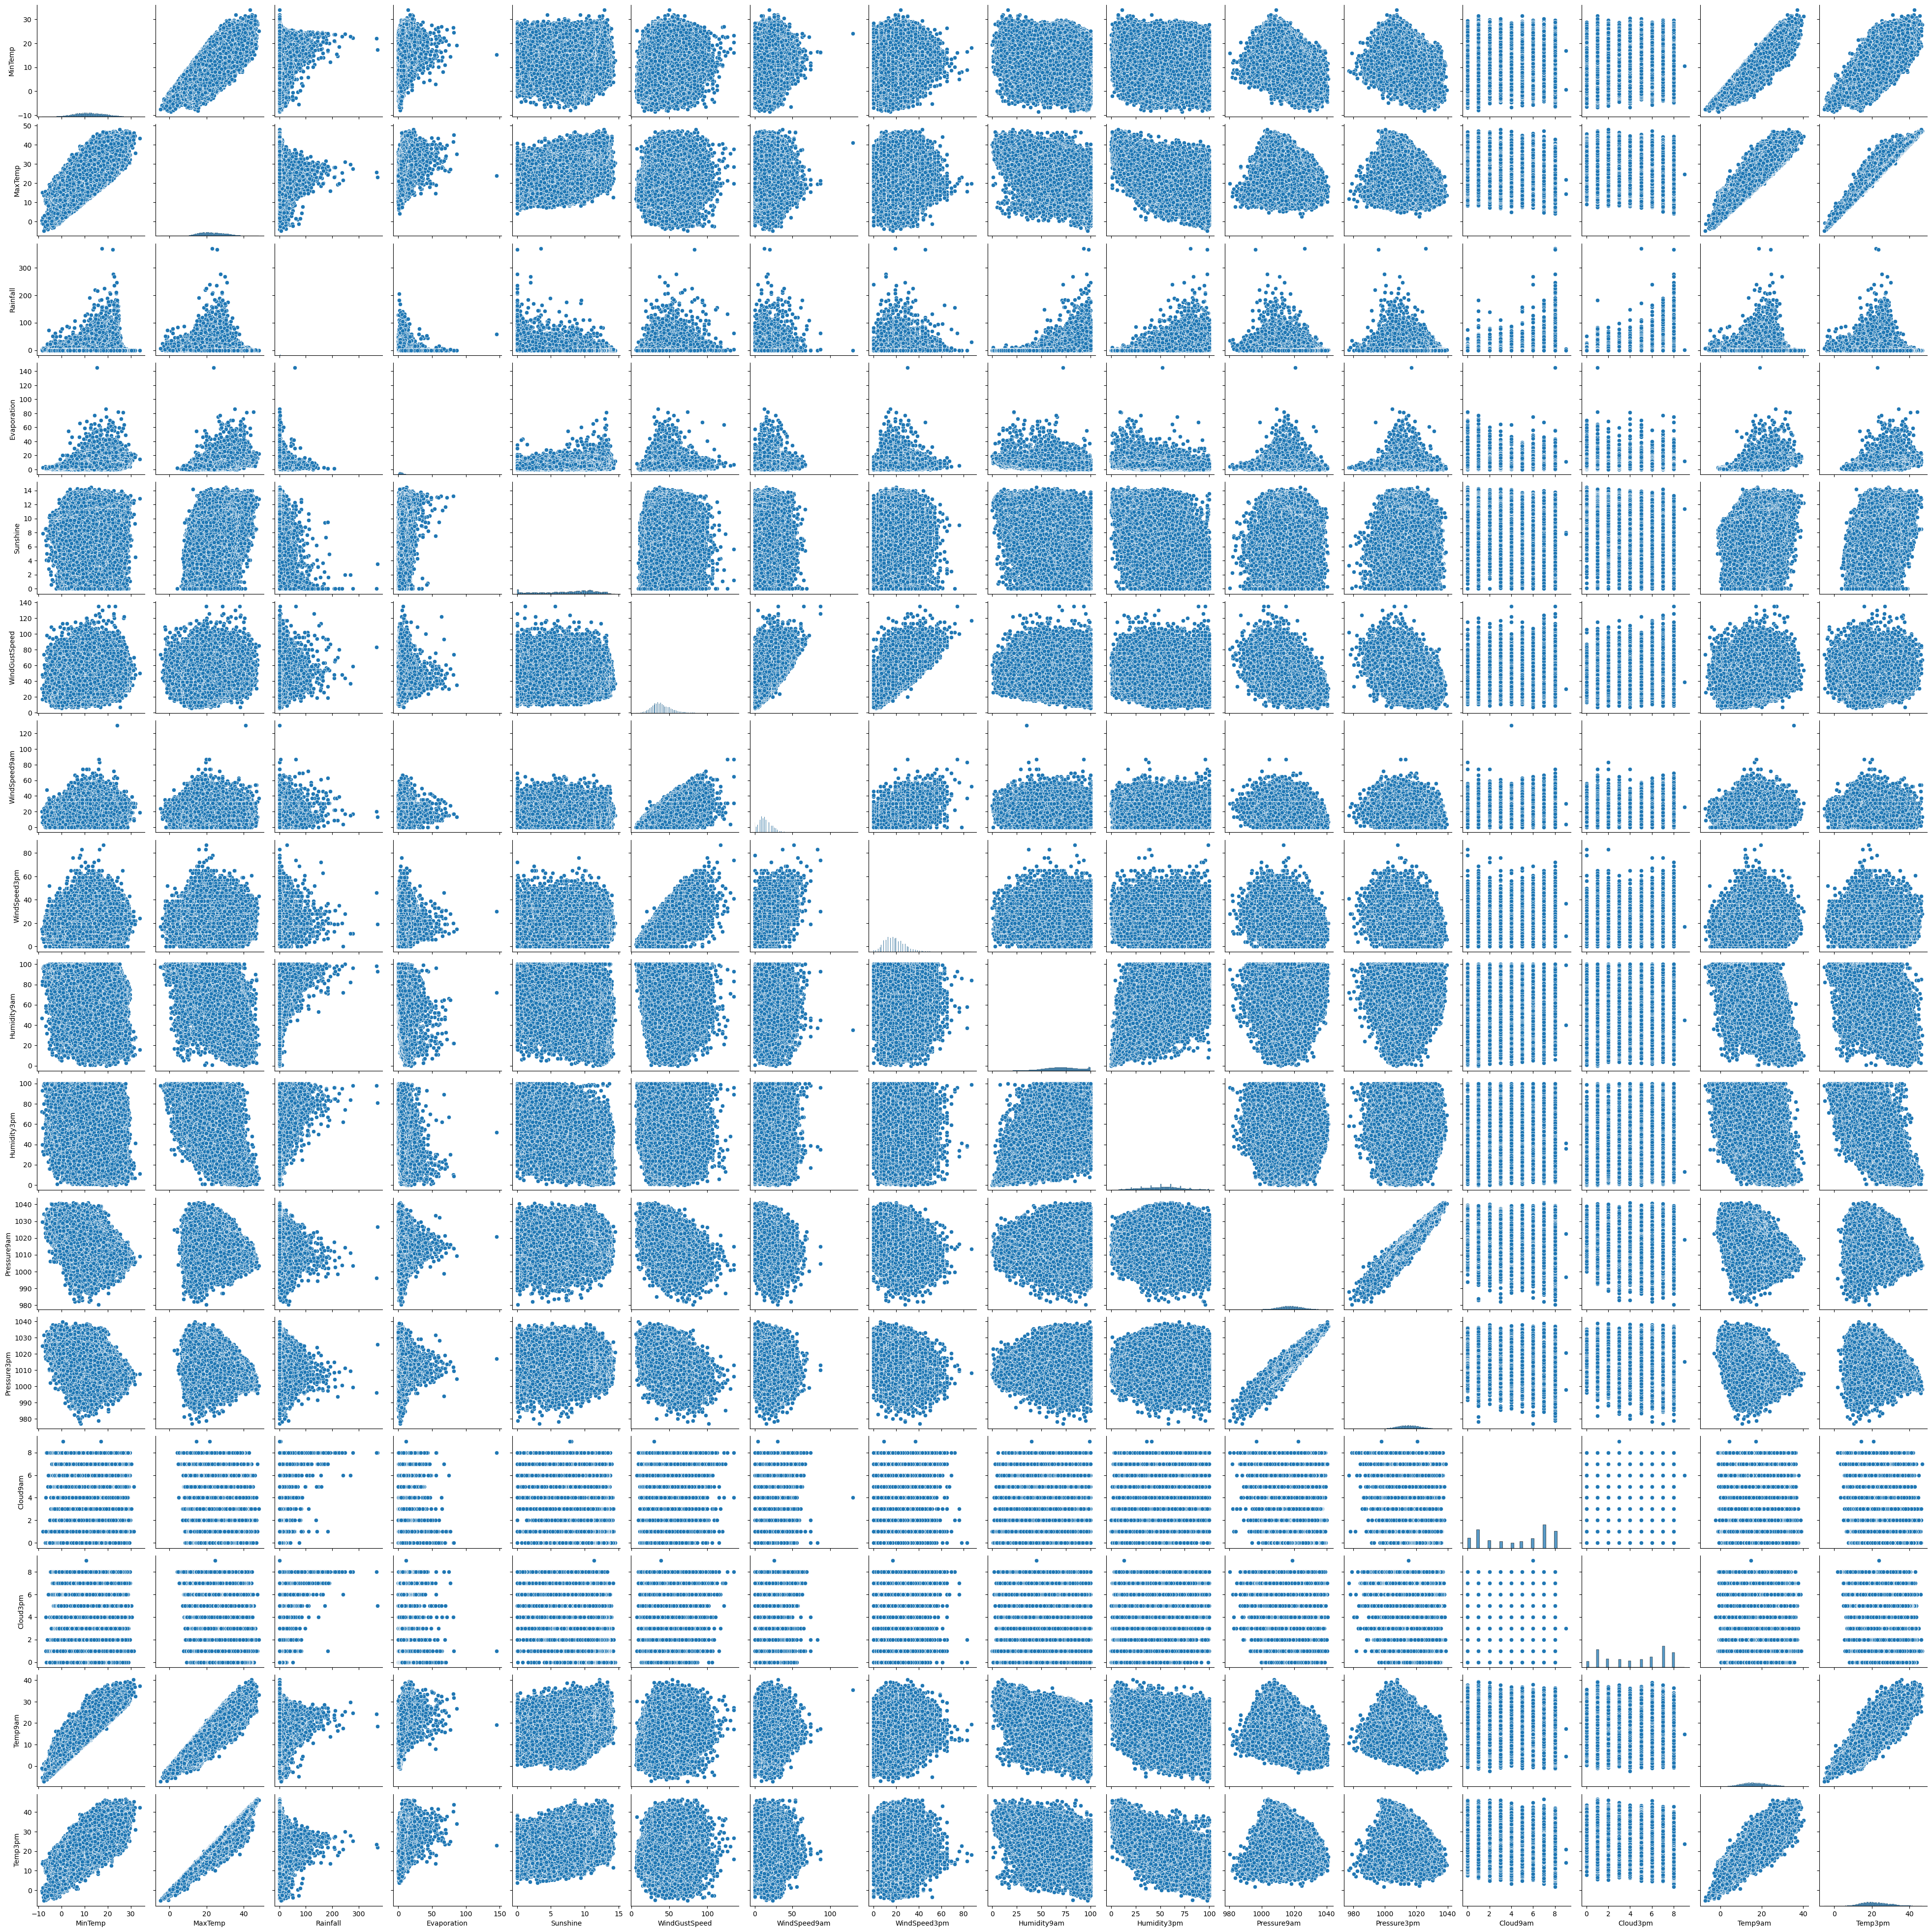

In [ ]:
sns.pairplot(df)